In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
class HiddenMarkovModel:
    def __init__(self) -> None:
        self.states: list[str] = ['R', 'P', 'S']
        self.transitions: dict[str, dict[str, int]] = { 
            'R': {'R': 1, 'P': 1, 'S': 1}, 
            'P': {'R': 1, 'P': 1, 'S': 1}, 
            'S': {'R': 1, 'P': 1, 'S': 1} 
        }

    def _normalize(self, state_from: str) -> None:
        total = sum(self.transitions[state_from].values())
        if total > 0:
            for state in self.states:
                self.transitions[state_from][state] /= total
                
    def learn_transition(self, state_from: str, state_to: str, payout: int) -> None:
        if payout == 1:
            self.transitions[state_from][state_to] += 1
           # self.transitions[state_from][state_to] *= 1.1
        elif payout == -1:
            self.transitions[state_from][state_to] *= 0.9

    def predict_next_state(self, current_state: str) -> str:
        transitions = self.transitions[current_state]
        max_count = max(transitions.values(), default=0)
        candidates = []
        for state, count in transitions.items():
            if count == max_count:
                candidates.append(state)

        if candidates:
            return np.random.choice(candidates)
        return np.random.choice(self.states)

In [86]:
def get_payout(computer_choice: str, player_choice: str) -> int:
    win_conditions = {"R": "S", "P": "R", "S": "P"}

    if computer_choice == player_choice:
        return 0 
    elif win_conditions[computer_choice] == player_choice:
        return 1 
    else:
        return -1  

In [88]:
model = HiddenMarkovModel()
options = ['R', 'P', 'S']
counter_move = {"R": "P", "P": "S", "S": "R"}  
previous_state = np.random.choice(options)

In [199]:
num_of_games = 50
cumulative_score = 0
correct_predictions = 0
scores = []

for i in range(num_of_games):
    player_move = np.random.choice(options) 

    pred = model.predict_next_state(previous_state)
    computer_move = counter_move[pred]  

    payout = get_payout(computer_move, player_move)
    model.learn_transition(previous_state, player_move, payout)

    previous_state = player_move

    if pred == player_move:
        correct_predictions += 1

    cumulative_score += payout
    scores.append(cumulative_score)

    print(f"Prediction: {pred}, Computer: {computer_move}, Player: {player_move}, Points: {payout}")

print("\nAccuracy:", correct_predictions / num_of_games)

Prediction: S, Computer: R, Player: P, Points: -1
Prediction: R, Computer: P, Player: S, Points: -1
Prediction: S, Computer: R, Player: R, Points: 0
Prediction: S, Computer: R, Player: S, Points: 1
Prediction: S, Computer: R, Player: R, Points: 0
Prediction: S, Computer: R, Player: S, Points: 1
Prediction: S, Computer: R, Player: S, Points: 1
Prediction: S, Computer: R, Player: S, Points: 1
Prediction: S, Computer: R, Player: P, Points: -1
Prediction: R, Computer: P, Player: R, Points: 1
Prediction: S, Computer: R, Player: R, Points: 0
Prediction: S, Computer: R, Player: R, Points: 0
Prediction: S, Computer: R, Player: P, Points: -1
Prediction: R, Computer: P, Player: R, Points: 1
Prediction: S, Computer: R, Player: R, Points: 0
Prediction: S, Computer: R, Player: R, Points: 0
Prediction: S, Computer: R, Player: P, Points: -1
Prediction: R, Computer: P, Player: P, Points: 0
Prediction: R, Computer: P, Player: P, Points: 0
Prediction: R, Computer: P, Player: R, Points: 1
Prediction: S, 

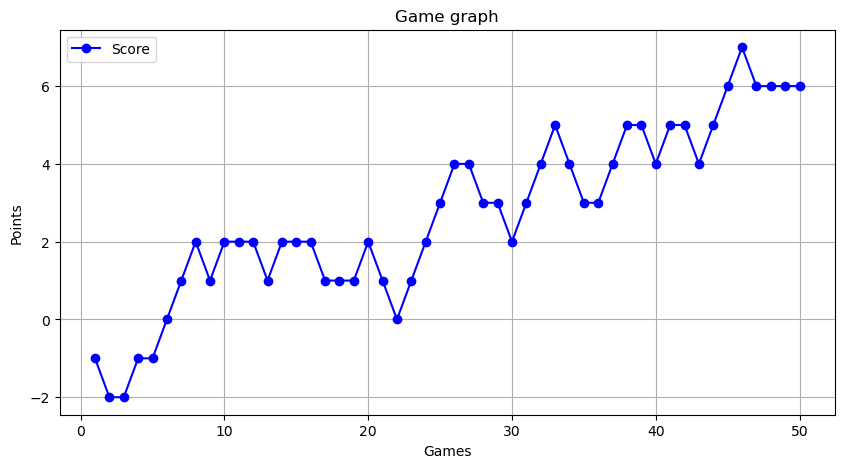

In [201]:
plt.figure(figsize=(10, 5))
plt.title("Game graph")
plt.plot(range(1, num_of_games + 1), scores, marker='o', linestyle='-', color='b', label="Score")
plt.xlabel("Games")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()